In [1]:
import tensorflow as tf 
from tensorflow import keras
 # For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split
# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib

In [2]:
#data_dir = r"C:\Users\Leaper\Desktop\ML_CODE\Classfication\20240110_PE_ImageClass\enhanceImg" 
data_dir = r"D:\Problems_solved\2024.01.08_建湖润阳卡舟印\imageData\train"
# Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train')

In [3]:
# OK = list(data_dir.glob('OK/*'))
# NG = list(data_dir.glob('NG/*'))

OK = list(data_dir.glob('10/*'))
NG = list(data_dir.glob('11/*'))
len(OK)

558

[WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh0.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh0ok.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh1.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh1ok.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh2.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh2ok.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh3.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh3ke.bmp'),
 WindowsPath('C:/Users/Leaper/Desktop/ML_CODE/Classfication/20240110_PE_ImageClass/enhanceImg/OK/1_enh3o

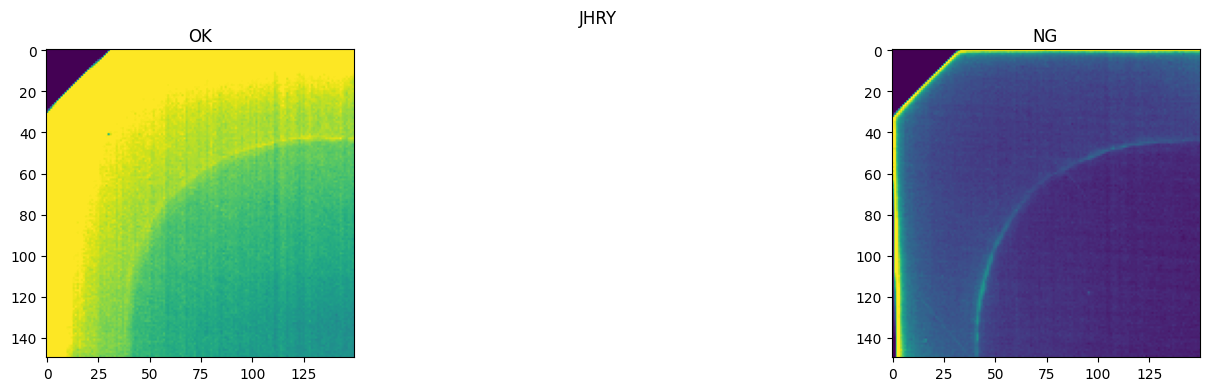

In [4]:
#检查图片
fig, ax = plt.subplots(ncols=2, figsize=(20,4))
fig.suptitle('JHRY')
OK_img = img.imread(OK[0])
NG_img = img.imread(NG[0])

ax[0].set_title('OK')
ax[1].set_title('NG')

ax[0].imshow(OK_img)
ax[1].imshow(NG_img)
OK


In [4]:
#分配标签
df_images = {
    'OK' : OK,
    'NG' : NG
}
df_labels = {
    'OK' : 0,
    'NG' : 1
}
df_images['OK']

[WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/1_ok0ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/1_ok1ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/1_ok2.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/1_ok3.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/1_ok3ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/2_ok0.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/2_ok0ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/2_ok1ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/2_ok2.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/2_ok3.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/train/10/3_ng2ok.bmp'),
 WindowsPath('D:/Problems_solved/2024.01.08_建湖润阳卡舟印/imageData/tr

In [7]:

img = cv2.imread(str(df_images['OK'][0])) 
#df_images['OK'][0]
print(img.shape)
#str(df_images['OK'][0])
# Converting it into numerical arrays
# Its currently 250 by 250 by 3

AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
#通过使用 items() 方法，你可以同时访问字典的键和值。
    for image in images:
        print(image)
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) 
# Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

D:\Problems_solved\2024.01.08_建湖润阳卡舟印\imageData\train\10\1_ok0ok.bmp


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [8]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [10]:
#mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' 
mobile_net =r"C:\Users\Leaper\Desktop\ML_CODE\Classfication\20240110_PE_ImageClass\archive"
# MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) 
# Removing the last layer

In [11]:
num_label = 2 # number of labels
model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)])
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
2/2 [==============================] - 3s 553ms/step - loss: 0.4582 - acc: 0.7556 - val_loss: 0.5681 - val_acc: 0.7500
Epoch 2/10
2/2 [==============================] - 1s 308ms/step - loss: 0.3443 - acc: 0.8222 - val_loss: 0.4563 - val_acc: 0.7500
Epoch 3/10
2/2 [==============================] - 1s 322ms/step - loss: 0.2914 - acc: 0.8889 - val_loss: 0.3740 - val_acc: 0.7500
Epoch 4/10
2/2 [==============================] - 1s 317ms/step - loss: 0.2464 - acc: 0.9333 - val_loss: 0.3197 - val_acc: 0.7500
Epoch 5/10
2/2 [==============================] - 1s 297ms/step - loss: 0.2072 - acc: 0.9556 - val_loss: 0.2774 - val_acc: 0.7500
Epoch 6/10
2/2 [==============================] - 1s 291ms/step - loss: 0.1845 - acc: 0.9778 - val_loss: 0.2409 - val_acc: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 297ms/step - loss: 0.1677 - acc: 0.9778 - val_loss: 0.2091 - val_acc: 1.0000
Epoch 8/10
2/2 [==============================] - 1s 300ms/step - loss: 0.1539 - acc: 0.97

In [13]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 189ms/step - loss: 0.4768 - acc: 0.7273


[0.4768333435058594, 0.7272727489471436]

In [14]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 1s 600ms/step
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



In [15]:

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd
init_notebook_mode(connected=True)
acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})
fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

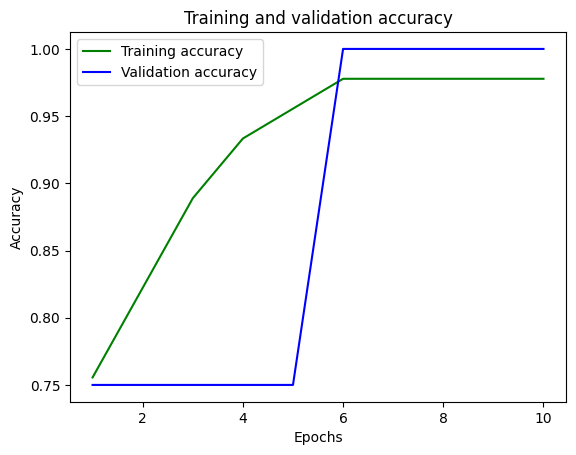

In [16]:
epochs = range(1, 11)
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

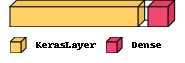

In [17]:
import visualkeras
visualkeras.layered_view(model, scale_xy=3, legend=True)